In [1]:
import sys
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pathlib import Path
from gmm.base_models.foreign_domestic_pricing import ForexModel
from gmm.models.foreign_domestic_gmm import ForeignDomestic_GMM
sys.executable

'C:\\Users\\Os\\AppData\\Local\\Programs\\Python\\Python310\\python.exe'

In [2]:
data_path = Path('gmm/datas/global_currency_indices_5y.csv')
df = pd.read_csv(data_path)
df.head

<bound method NDFrame.head of                    ID        DATE  CURRENCY    PX_LAST
0          AUD Curncy  2021-01-25       NaN     0.7713
1          AUD Curncy  2021-01-26       NaN     0.7747
2          AUD Curncy  2021-01-27       NaN     0.7663
3          AUD Curncy  2021-01-28       NaN     0.7683
4          AUD Curncy  2021-01-29       NaN     0.7644
...               ...         ...       ...        ...
456745  GBPKRW Curncy  2026-01-21       NaN  1969.0642
456746  GBPKRW Curncy  2026-01-22       NaN  1977.8676
456747  GBPKRW Curncy  2026-01-23       NaN  1996.4448
456748  GBPKRW Curncy  2026-01-24       NaN  1996.4448
456749  GBPKRW Curncy  2026-01-25       NaN  1996.4448

[456750 rows x 4 columns]>

In [3]:
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.sort_values("DATE")
print(df)

                   ID       DATE  CURRENCY      PX_LAST
0          AUD Curncy 2021-01-25       NaN       0.7713
126063  USDNOK Curncy 2021-01-25       NaN       8.5353
241164  CHFEUR Curncy 2021-01-25       NaN       0.9273
418383  GBPBRL Curncy 2021-01-25       NaN       7.4766
436653     KWD Curncy 2021-01-25       NaN       0.3027
...               ...        ...       ...          ...
292319  EURRUB Curncy 2026-01-25       NaN      89.6120
290492  EURTHB Curncy 2026-01-25       NaN      36.7381
288665  GBPHKD Curncy 2026-01-25       NaN      10.6376
312416  XAUJPY Curncy 2026-01-25       NaN  776377.7500
456749  GBPKRW Curncy 2026-01-25       NaN    1996.4448

[456750 rows x 4 columns]


In [4]:
fx_map = {"JPY": "USDJPY Curncy","EUR": "EURUSD Curncy"}
rf_map = {"JPY": -0.0120,"EUR":  0.0085}

In [5]:
tickers = ["USDJPY Curncy", "EURUSD Curncy"]
df_fx = (df[df["ID"].isin(tickers)].sort_values("DATE").pivot(index="DATE", columns="ID", values="PX_LAST").dropna())
print(df)

                   ID       DATE  CURRENCY      PX_LAST
0          AUD Curncy 2021-01-25       NaN       0.7713
126063  USDNOK Curncy 2021-01-25       NaN       8.5353
241164  CHFEUR Curncy 2021-01-25       NaN       0.9273
418383  GBPBRL Curncy 2021-01-25       NaN       7.4766
436653     KWD Curncy 2021-01-25       NaN       0.3027
...               ...        ...       ...          ...
292319  EURRUB Curncy 2026-01-25       NaN      89.6120
290492  EURTHB Curncy 2026-01-25       NaN      36.7381
288665  GBPHKD Curncy 2026-01-25       NaN      10.6376
312416  XAUJPY Curncy 2026-01-25       NaN  776377.7500
456749  GBPKRW Curncy 2026-01-25       NaN    1996.4448

[456750 rows x 4 columns]


In [6]:
df_norm = df_fx / df_fx.iloc[0]
ret = np.log(df_norm / df_norm.shift(1)).dropna()
S0 = df_norm["USDJPY Curncy"].iloc[-1]
Q0 = df_norm["EURUSD Curncy"].iloc[-1]
sigma1 = ret["USDJPY Curncy"].std() * np.sqrt(252)
sigma2 = ret["EURUSD Curncy"].std() * np.sqrt(252)
rho = ret.corr().iloc[0, 1]
mu1 = ret["USDJPY Curncy"].mean() * 252
mu2 = ret["EURUSD Curncy"].mean() * 252
alpha = mu1 - 0.5 * sigma1**2
gamma = mu2 - 0.5 * sigma2**2
r  = 0.0475
rf = 0.0085  

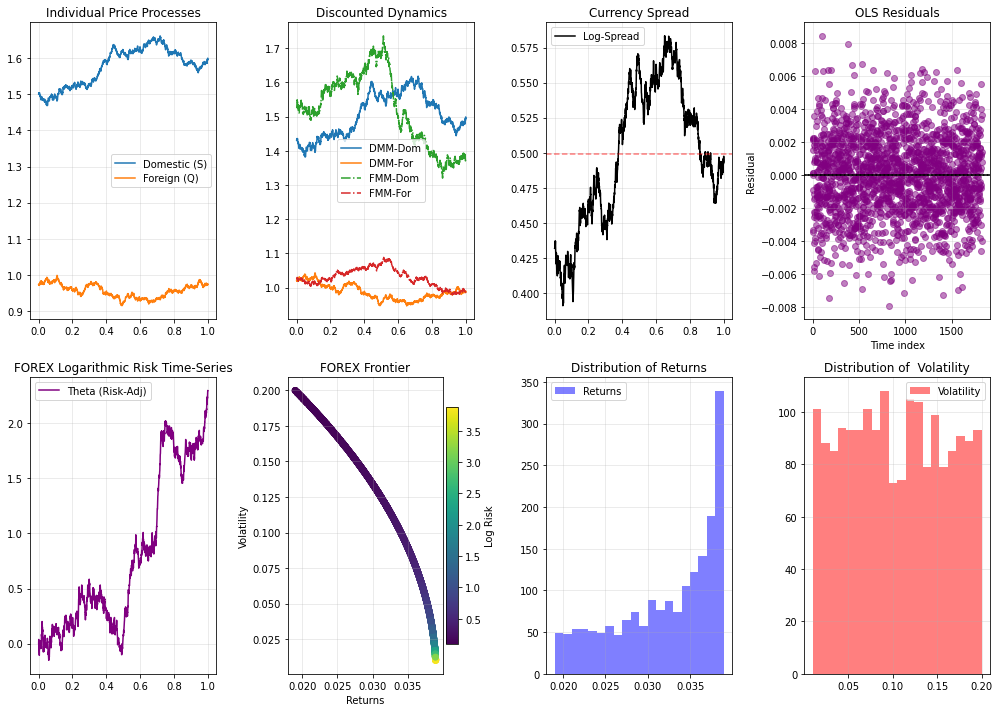

In [7]:
model = ForexModel(T=1, N=len(df_norm))
model.plot_forex_analysis(S0=S0,Q0=Q0,r=r,rf=rf,gamma=gamma,alpha=alpha,sigma1=sigma1,sigma2=sigma2,rho=rho)

In [8]:
usd_fx_tickers = [
    "AUDUSD Curncy","BRLUSD Curncy","CADUSD Curncy","CHFUSD Curncy",
    "CNHUSD Curncy","CNYUSD Curncy","EURUSD Curncy","GBPUSD Curncy",
    "HKDUSD Curncy","IDRUSD Curncy","INRUSD Curncy","JPYUSD Curncy",
    "KRWUSD Curncy","MXNUSD Curncy","NOKUSD Curncy","NZDUSD Curncy",
    "SEKUSD Curncy","SGDUSD Curncy",
    "USDAED Curncy","USDAOA Curncy","USDARS Curncy","USDAUD Curncy",
    "USDBRL Curncy","USDCAD Curncy","USDCHF Curncy","USDCLP Curncy",
    "USDCNH Curncy","USDCNY Curncy","USDCOP Curncy","USDCZK Curncy",
    "USDDKK Curncy","USDEGP Curncy","USDEUR Curncy","USDGBP Curncy",
    "USDGHS Curncy","USDHKD Curncy","USDHUF Curncy","USDIDR Curncy",
    "USDILS Curncy","USDINR Curncy","USDIRR Curncy","USDJPY Curncy",
    "USDKES Curncy","USDKRW Curncy","USDKZT Curncy","USDMXN Curncy",
    "USDMYR Curncy","USDNGN Curncy","USDNOK Curncy","USDNZD Curncy",
    "USDPEN Curncy","USDPHP Curncy","USDPLN Curncy","USDRUB Curncy",
    "USDSAR Curncy","USDSEK Curncy","USDSGD Curncy","USDTHB Curncy",
    "USDTRY Curncy","USDTWD Curncy","USDUGX Curncy","USDUYU Curncy",
    "USDVND Curncy","USDZAR Curncy",
    "XAGUSD Curncy","XAUUSD Curncy","XPDUSD Curncy","XPTUSD Curncy"
]

In [9]:
def parse_fx_pair(pair_id):
    pair = pair_id.replace(" Curncy", "")
    base = pair[:3]
    quote = pair[3:]
    return base, quote
def fx_to_foreign_per_usd(pair_id, px):
    base, quote = parse_fx_pair(pair_id)
    if quote == "USD":      
        return px
    elif base == "USD":    
        return 1.0 / px
    else:
        raise ValueError(f"Non-USD FX pair: {pair_id}")

In [21]:
real_interest_rates = { "USD": 0.0189, "EUR": 0.0085, "GBP": 0.0050, "JPY": -0.0120, "AUD": 0.0150, "CAD": 0.0125, "CHF": -0.0050, "CNH": 0.0210, "INR": 0.0150, "BRL": 0.0450, "MXN": 0.0605, "IDR": 0.0245, "ZAR": 0.0210, "TRY": -0.1500, "RUB": 0.0320, "SGD": 0.0080, "HKD": 0.0110, "NZD": 0.0130, "NOK": 0.0090, "SEK": 0.0040 }

In [11]:
def run_fx_pair_model(df_fx,pair_id,real_rates,r_usd=0.0189,dt=1/252,verbose=False):
    base, quote = parse_fx_pair(pair_id)
    foreign = base if quote == "USD" else quote
    if foreign not in real_rates:
        return None
    rf = real_rates[foreign]
    df_pair = (df_fx[df_fx["ID"] == pair_id].sort_values("DATE").copy())
    df_pair["FX_USD"] = df_pair["PX_LAST"].apply(lambda x: fx_to_foreign_per_usd(pair_id, x))
    log_fx = np.log(df_pair["FX_USD"])
    ret = log_fx.diff().dropna()
    if len(ret) < 200:
        return None
    mu2 = ret.mean() * 252
    sigma2 = ret.std() * np.sqrt(252)
    gamma_hat = mu2 - 0.5 * sigma2**2
    em_currencies = ["EUR","GBP","JPY","AUD","CAD","CHF","CNH","INR","BRL","MXN","IDR","ZAR","TRY","RUB","SGD","HKD","NZD","NOK","SEK"]
    EM = int(foreign in em_currencies)
    Z_ts = EM * np.ones(len(ret)) 
    gmm = ForeignDomestic_GMM(r=r_usd,rf=rf,dt=dt,instruments=Z_ts,verbose=verbose)
    S_series = pd.Series(1.0, index=ret.index)
    Q_series = np.exp(log_fx.loc[ret.index])
    gmm_res = gmm.fit_gmm(S_series=S_series, Q_series=Q_series)
    return {"pair": pair_id,"foreign": foreign,"rf": rf,"gamma_sample": gamma_hat,"gamma_gmm": gmm_res["gamma"],"sigma2": sigma2,"jstat": gmm_res["J"]}

In [14]:
results = []
for pair_id in usd_fx_tickers:
    try:
        res = run_fx_pair_model(df_fx=df,pair_id=pair_id,real_rates=real_interest_rates,verbose=False)
        if res is not None:
            results.append(res)
    except Exception as e:
        print(pair_id, "failed:", e)
results_df = pd.DataFrame(results)
print(results_df)

             pair foreign      rf  gamma_sample  gamma_gmm    sigma2  \
0   AUDUSD Curncy     AUD  0.0150     -0.019289  -0.020010  0.087139   
1   BRLUSD Curncy     BRL  0.0450     -0.002360   0.027947  0.118605   
2   CADUSD Curncy     CAD  0.0125     -0.011452  -0.016904  0.054414   
3   CHFUSD Curncy     CHF -0.0050      0.015657  -0.006158  0.067573   
4   CNHUSD Curncy     CNH  0.0210     -0.010398  -0.007714  0.041413   
5   EURUSD Curncy     EUR  0.0085     -0.005619  -0.014223  0.063828   
6   GBPUSD Curncy     GBP  0.0050     -0.002820  -0.014836  0.070662   
7   HKDUSD Curncy     HKD  0.0110     -0.000825  -0.008705  0.006326   
8   IDRUSD Curncy     IDR  0.0245     -0.025437  -0.019097  0.045887   
9   INRUSD Curncy     INR  0.0150     -0.032450  -0.035938  0.034356   
10  JPYUSD Curncy     JPY -0.0120     -0.059337  -0.087110  0.081611   
11  MXNUSD Curncy     MXN  0.0605      0.015860   0.061031  0.093717   
12  NOKUSD Curncy     NOK  0.0090     -0.023858  -0.028298  0.10

In [24]:
def get_fx_series(df, pair_id):
    df_pair = (df[df["ID"] == pair_id].sort_values("DATE").set_index("DATE")["PX_LAST"].astype(float))
    return df_pair / df_pair.iloc[0]  

In [25]:
def get_fx_gmm_series(df_fx, pair_id, gamma, dt=1/252):
    Q = get_fx_series(df_fx, pair_id)
    t = np.arange(len(Q))
    logQ_gmm = np.log(Q) - gamma * t * dt
    Q_gmm = np.exp(logQ_gmm)
    return Q_gmm / Q_gmm.iloc[0]

In [26]:
pairs_to_plot = [
    "AUDUSD Curncy",
    "BRLUSD Curncy",
    "CADUSD Curncy",
    "CHFUSD Curncy",
    "CNHUSD Curncy",
    "CNYUSD Curncy",
    "EURUSD Curncy",
    "GBPUSD Curncy",
    "HKDUSD Curncy",
    "IDRUSD Curncy",
    "INRUSD Curncy",
    "JPYUSD Curncy",
    "KRWUSD Curncy",
    "MXNUSD Curncy",
    "NOKUSD Curncy",
    "NZDUSD Curncy",
    "SEKUSD Curncy",
    "SGDUSD Curncy",
    "XAGUSD Curncy",
    "XAUUSD Curncy",
    "XPDUSD Curncy",
    "XPTUSD Curncy"
]


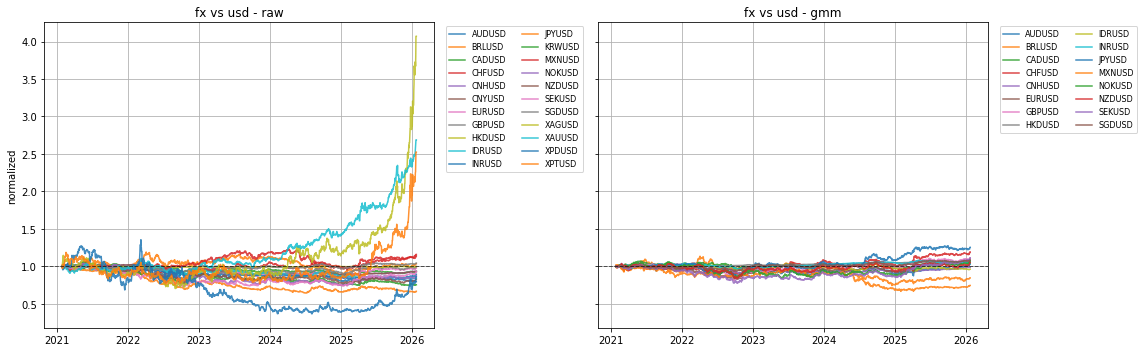

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
for pair in pairs_to_plot:
    Q = get_fx_series(df, pair)
    axes[0].plot(Q.index, Q.values, alpha=0.85,label=pair.replace(" Curncy", ""))
axes[0].set_title("fx vs usd - raw")
axes[0].set_ylabel("normalized")
axes[0].axhline(1.0, color="black", ls="--", lw=1, alpha=0.6)
axes[0].grid(True)
for pair in pairs_to_plot:
    if pair not in results_df["pair"].values:
        continue
    gamma = results_df.loc[results_df["pair"] == pair, "gamma_gmm"].iloc[0]
    Q_gmm = get_fx_gmm_series(df, pair, gamma)
    axes[1].plot(Q_gmm.index, Q_gmm.values, alpha=0.85, label=pair.replace(" Curncy", ""))
axes[1].set_title("fx vs usd - gmm")
axes[1].axhline(1.0, color="black", ls="--", lw=1, alpha=0.6)
axes[1].grid(True)
axes[0].legend(fontsize=8, ncol=2, loc="upper left", bbox_to_anchor=(1.02, 1))
axes[1].legend(fontsize=8, ncol=2, loc="upper left", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()